https://ensekitt.hatenablog.com/entry/2018/08/22/200000


In [1]:
import lightgbm as lgb
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [2]:
# Breast Cancer データセットを読み込む
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target
col_list = [name.replace(' ', '_') for name in bc.feature_names]

X = pd.DataFrame(bc.data,  columns=col_list)
y = pd.DataFrame(bc.target, columns=['target'])

display(X)
display(y)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


,target
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


In [3]:
# 訓練データとテストデータに分割する
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
542,14.740,25.42,94.70,668.6,0.08275,0.07214,0.04105,0.03027,0.1840,0.05680,...,16.51,32.29,107.40,826.4,0.10600,0.13760,0.16110,0.10950,0.2722,0.06956
106,11.640,18.33,75.17,412.5,0.11420,0.10170,0.07070,0.03485,0.1801,0.06520,...,13.14,29.26,85.51,521.7,0.16880,0.26600,0.28730,0.12180,0.2806,0.09097
319,12.430,17.00,78.60,477.3,0.07557,0.03454,0.01342,0.01699,0.1472,0.05561,...,12.90,20.21,81.76,515.9,0.08409,0.04712,0.02237,0.02832,0.1901,0.05932
383,12.390,17.48,80.64,462.9,0.10420,0.12970,0.05892,0.02880,0.1779,0.06588,...,14.18,23.13,95.23,600.5,0.14270,0.35930,0.32060,0.09804,0.2819,0.11180
430,14.900,22.53,102.10,685.0,0.09947,0.22250,0.27330,0.09711,0.2041,0.06898,...,16.35,27.57,125.40,832.7,0.14190,0.70900,0.90190,0.24750,0.2866,0.11550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,15.100,16.39,99.58,674.5,0.11500,0.18070,0.11380,0.08534,0.2001,0.06467,...,16.11,18.33,105.90,762.6,0.13860,0.28830,0.19600,0.14230,0.2590,0.07779
462,14.400,26.99,92.25,646.1,0.06995,0.05223,0.03476,0.01737,0.1707,0.05433,...,15.40,31.98,100.40,734.6,0.10170,0.14600,0.14720,0.05563,0.2345,0.06464
372,21.370,15.10,141.30,1386.0,0.10010,0.15150,0.19320,0.12550,0.1973,0.06183,...,22.69,21.84,152.10,1535.0,0.11920,0.28400,0.40240,0.19660,0.2730,0.08666
34,16.130,17.88,107.00,807.2,0.10400,0.15590,0.13540,0.07752,0.1998,0.06515,...,20.21,27.26,132.70,1261.0,0.14460,0.58040,0.52740,0.18640,0.4270,0.12330


In [13]:
# データセットを生成する
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

# LightGBM のハイパーパラメータ
lgbm_params = {
    # 二値分類問題
    'objective': 'binary',
    # AUC の最大化を目指す
    'metric': 'auc',
    # # 最大イテレーション回数指定
    # 'num_iterations' : 1000,
    # # early_stopping 回数指定
    # 'early_stopping_rounds' : 100,
}

# 上記のパラメータでモデルを学習する
model = lgb.train(lgbm_params, lgb_train, valid_sets=lgb_eval,
                  verbose_eval=50  # 50イテレーション毎に学習結果出力
                 )

# テストデータを予測する
y_pred = model.predict(X_test, num_iteration=model.best_iteration)

pred_df = pd.concat([y_test.reset_index(drop=True), pd.Series(y_pred)], axis = 1)
pred_df.columns = ['true', 'pred']
pred_df

[LightGBM] [Info] Number of positive: 282, number of negative: 173
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003556 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4542
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.619780 -> initscore=0.488615
[LightGBM] [Info] Start training from score 0.488615
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

,true,pred
0,1,0.999434
1,0,0.000294
2,1,0.999958
3,0,0.000060
4,1,0.999982
...,...,...
109,0,0.000040
110,1,0.999976
111,1,0.999904
112,1,0.992946


In [16]:
pred_df['pred'] = [1 if pred >= 0.5 else 0 for pred in pred_df['pred'].values]
cm = confusion_matrix(pred_df['true'], pred_df['pred'])
print(cm)

[[35  4]
 [ 1 74]]


[1.99998351e+00 9.99983505e-01 8.64605793e-01 6.18393750e-01
 4.65124417e-01 2.48331891e-05]
0.9972649572649573


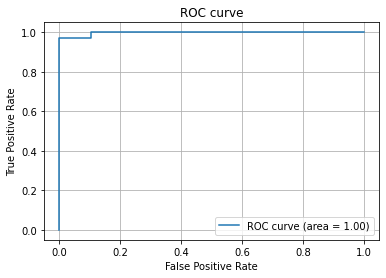

In [20]:
# AUC (Area Under the Curve) を計算する
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
# fpr, tpr, thresholds = metrics.roc_curve(pred_df['true'], pred_df['pred'])
auc = metrics.auc(fpr, tpr)
print(thresholds)
print(auc)

# ROC曲線をプロット
plt.plot(fpr, tpr, label='ROC curve (area = %.2f)'%auc)
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)